# Prática 3: Exploração de Dados - Parte III

### Kelvin Guilherme de Oliveira - 9293286
### Lucas Yudi Sugi - 9293251

Este trabalho tem como objetivo reanalisar as perguntas elaboradas na prática anterior, a fim de verificar se existe a possibilidade de melhorá-las, e, além disso, utilizar outras medidas estatísticas com a finalidade de obter uma resposta ainda mais precisa para as perguntas.

### -------------------------------------------------------------------------------------------------------------------------------------------

## Dataset 1: Diabetes

### Reavaliação das perguntas

1 - Como a progressão da doença é impactada pelo sexo do paciente ?<br>
2 - Como a progressão da doença é impactada pela faixa etária do paciente ?<br>
3 - Qual medida está mais correlacionada com a progressão da doença ?<br>

Dado que na prática I e II tivemos evidências muito fortes para responder tais perguntas e, como o objetivo dessa prática é utilizar medidas e representações estatísticas, como boxplot, histograma, covariância e correlação (medidas já utilizadas anteriormente), iremos realizar outras perguntas para entender melhor os dados:

#### Novas perguntas
1 - Qual a relação entre BMI (Body Mass Index) e BP (Blood pressure) ?<br>
2 - Como Ldl, Hdl e Glu estão relacionados ?<br>
3 - Qual a relação entre HDL e BMI ?<br>

Tais perguntas estão sendo realizadas para tirar as seguintes dúvidas e avaliar hipóteses:<br>
1 - Quanto maior o índice de massa corporal, maior será a pressão sanguínea<br> 
2 - Como as medidas sanguíneas se afetam entre si<br>
3 - Quanto maior o índice de massa corporal maior será o nível de colesterol ruim (HDL)<br>

Tais dúvidas/hipóteses foram elaboradas porque por meio de experiências passadas acredita-se que isso ocorra. 

Para a reanálise do dataset, utilizaremos os seguintes atributos:

BMI<br>
BP<br>
Ldl (S1)<br>
Hdl (S2)<br>
Glu (S3)<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#Leitura dos dados
dataset = pd.read_table('./datasets/diabetes/diabetes.tab.txt')

#Apresentação de alguns dados
dataset.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


## Histograma

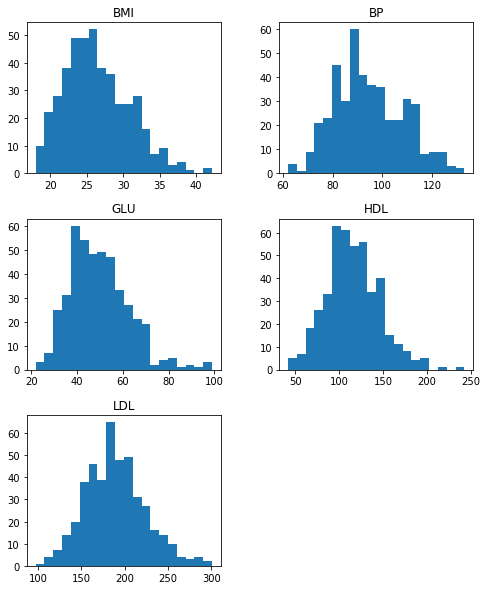

In [2]:
#Extraindo apenas os atributos necessarios
diabete = dataset[['BMI','BP','S1','S2','S3','Y']].copy()

#Renomeando colunas
diabete.columns = ['BMI','BP','LDL','HDL','GLU','CLASS']

#Plotando o histograma
diabete.iloc[:,0:5].hist(figsize=(8,10),bins=20,grid=False)
plt.show()

### Histograma - Respostas

Para escolher o parâmetro bin, testamos diversos valores, desde valores pequenos, como 2 e 5, a valores grandes como 100. Com isso, podemos perceber que o valor 20 é o que melhor apresenta o comportamento dos dados, devido a semelhança da curva gerada com a distribuição normal, garantindo que cada intervalo tenha no mínimo 22 exemplos (442/20).

A relação entre o histograma e boxplot é que ambos tentam representar a distribuição dos dados, sendo que o histograma mostra melhor a curva da distribuição dos dados, enquanto que o boxplot permite visualizar a mediana, mínimo e máximo, e quartis de uma forma mais simplória. Podemos inferir o histograma por meio do boxplot ao utilizar a distância entre os quartis Q1 e Q3 (curtose) e a mediana (simetria), e o contrário pode ser obtido por meio do cálculo dos parâmetros necessários da curva gerada.

## Análise Multivariada

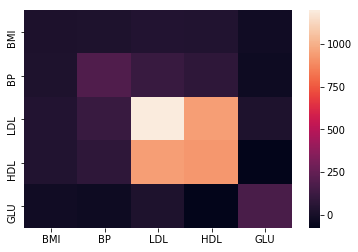

In [3]:
#Calculo da covariancia
cov = diabete.iloc[:,0:5].cov()

#Plotando o heatmap
sns.heatmap(cov)
plt.show()

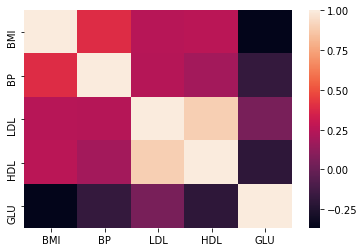

In [4]:
#Calculo da correlação
corr = diabete.iloc[:,0:5].corr()

#Plotando o heatmap
sns.heatmap(corr)
plt.show()

### Covariância e Correlação - Respostas

A correlação é mais informativa que a covariância por não termos a influência da unidade de medida, permitindo que haja um melhor entendimento dos dados. Sendo assim, a diferença entre as duas é que a correlação elimina a influência da faixa de valores.

Quando se deseja avaliar o grau de linearidade entre os atributos a correlação é mais indicada, pois ela permite interpretar de forma mais precisa tal relação. Já a covariância pode ser utilizada para verificar a variabilidade de um atributo, sua matriz também é importante pois ela é base para vários cálculos estatísticos.

Como nossas perguntas referem-se ao relacionamento entre os atributos, essas medidas são totalmente cabíveis de serem avaliadas para auxiliarem na formulação de hipóteses.

### Scatter Plot - Respostas

Geramos o gráfico de dispersão conforme visualizado abaixo. Dado que o nosso atributo classe é contínuo, não fez sentido realizar uma separação por classes envolvendo cores.

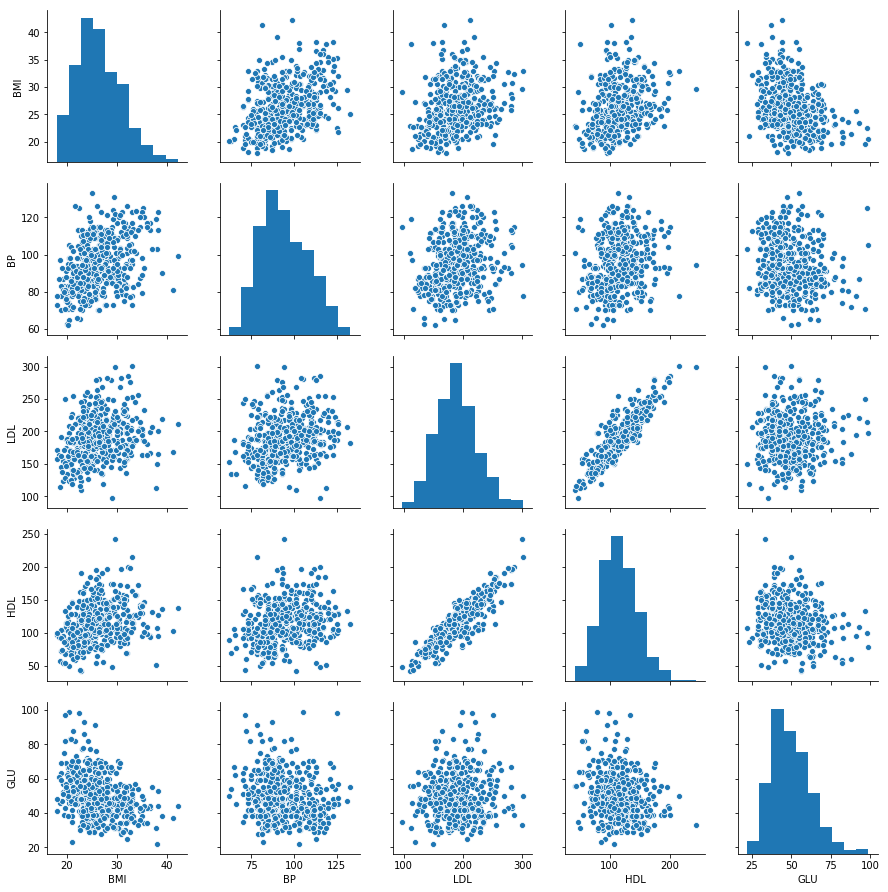

In [5]:
sns.pairplot(data=diabete.iloc[:,0:5])
plt.show()

### Gráficos - Respostas

Com os scatter plots, podemos facilmente identificar a tendência entre duas variáveis como ocorre entre HDL e LDL. Note que há um relacionamento linear entre ambas. Caso os dados sejam linearmente separáveis, é possível identificar isso por meio dos gráficos.

Com relação aos outliers, podemos identificá-los por meio dos pontos que estão muito fora da nuvem de dados como ocorre, por exemplo, em GLU e BP (100,125). Por conta desses e outros motivos, os gráficos colaboram para a inspeção de tendências, padrões e outliers em conjuntos de dados.

## Reavaliação das hipóteses

#### Pergunta 1 (Relação entre BMI e BP)
Por meio da análise das medidas e representações exibidas anteriormente, com destaque para o gráfico de Correlação, podemos tirar evidências de que os atributos BMI (Body Mass Index) e BP (Blood Pressure) são diretamente proporcionais, o que indica que quanto maior o índice de massa corpórea, maior será a pressão sanguínea, hipótese essa que era a proposta de estudo dessa questão.<br>

#### Pergunta 2 (Relação entre Ldl, Hdl e Glu)
Com análise similar à realizada para responder a questão 1, podemos verificar que os atributos LDL e HDL são fortemente relacionados (correlação quase 1), e que o atributo GLU não possui relação tão forte com os outros dois, pelo menos nessa análise não foi possível encontrar uma relação muito forte para ele.<br>

#### Pergunta 3 (Relação entre HDL e BMI)
Novamente de forma similar à análise realizada nas perguntas 1 e 2, podemos verificar que o BMI é diretamente proporcional ao HDL, mas não caracteriza uma relação muito direta, sendo ainda praticamente igual à relação que o atributo BMI possui com o LDL (colesterol bom), ou seja, com esse conjunto de dados e a análise exploratória realizada, não temos evidências para garantir que o BMI impacta no nível de colesterol bom ou ruim (LDL x HDL).<br>

### -------------------------------------------------------------------------------------------------------------------------------------------

## Dataset 2: Falhas de plantio

### Reavaliação das Perguntas

1 - O ph do solo segue uma distribuição normal?<br>
2 - A velocidade média de plantio segue uma normal?<br>
3 - Qual a relação entre o ph do solo e os componentes potassio, calcio e magnesio?<br>

Dado que nas práticas I e II obtivemos fortes evidências que conseguem responder as perguntas realizadas, iremos nesta prática formular novas questões que nos permitirão entender melhor o dataset.

#### Novas Perguntas

1 - A porcentagem de falhas no plantio ou de infestação de pragas segue uma normal univariada?<br>
2 - Qual a relação entre a velocidade média de plantio e o Ph do solo?<br>
3 - Qual a relação entre o fertilizante(L) e a velocidade média de plantio?<br>

Note que tais perguntas foram levantadas para que possamos avaliar as hipóteses:

1 - Normalidade dos atributos <br>
2 - A velocidade média de plantio é afetada pelo Ph <br>
3 - O fertilizante afeta a velocidade média de plantio <br>

Utilizaremos os seguintes atributos:

Perc_Falha - Porcentagem de falha <br>
Perc_Infest_Inv - Porcentagem de infestação de pragas <br>
Ph - Ph do solo<br> 
VM - Velocidade média de plantio<br>
FERT_L - Fertilizante(L)<br>

In [6]:
#Leitura do dataset com o pandas
dataset = pd.read_csv('./datasets/agro/falhas_plantio_hashing.csv',sep=';',header=0,encoding='latin1')

#Extração dos atributos necessários excluindo os Nan valores
agro = dataset[['Perc_Falha','Perc_Infest_Inv','VM','Ph','FERT_L']].dropna().copy()

agro.head()

,Perc_Falha,Perc_Infest_Inv,VM,Ph,FERT_L
3,0.0182,0,5.55,4.65,0.0
4,0.0214,0,5.55,4.65,0.0
5,0.0153,0,5.58,4.65,0.0
6,0.0056,0,5.43,4.75,0.0
7,0.0073,0,5.42,4.75,0.0


## Histograma

In [ ]:
#Plotando os histogramas de cada atributo
plt.figure(figsize=(10, 5))
for i in range(len(agro.columns)):
    ax = plt.subplot(2,3,i+1)
    agro.iloc[:,i].hist(bins=len(agro.iloc[:,i])//30,grid=False)
    ax.set_title(agro.columns[i],loc='left')
    
plt.tight_layout()
plt.show()

### Histograma - Respostas

Para escolher o número de bins para plotagem utilizamos a regra usual, de aproximadamente 30 exemplos por bin. Os dados não foram divididos em nenhum atributo devido a grande variância que há no dataset.

A relação entre o Histograma e o Boxplot já foi explicada nas respostas relacionadas ao Histograma do Dataset 1.

## Análise Multivariada

In [ ]:
#Cálculo da covariância
cov = agro.cov()
sns.heatmap(cov)

#Plotando o seu heatmap
plt.show()

In [ ]:
#Cálculo da correlação
corr = agro.corr()
sns.heatmap(corr)

#Plotando o seu heatmap
plt.show()

### Covariância e Correlação - Respostas

Em nosso caso, a correlação é mais informativa pois ela consegue fornecer de forma mais intuitiva o grau de relacionamento entre as variáveis. Quando se deseja avaliar o grau de linearidade entre os atributos a correlação é mais indicada, pois ela permite interpretar de forma mais precisa tal relação. Já a covariância pode ser utilizada para verificar a variabilidade de um atributo, sua matriz também é importante pois ela é base para vários cálculos estatísticos.

Como nossas perguntas referem-se ao relacionamento entre os atributos, essas medidas são totalmente cabíveis de serem avaliadas para auxiliarem na formulação de hipóteses.

### Scatter Plot - Respostas

Geramos o gráfico de dispersão conforme abaixo. Dado que nossos atributos possuem uma variância muito grande, não será realizado a plotagem por separação de cor.

In [ ]:
#Gráfico de dispersão
sns.pairplot(agro)
plt.show()

### Gráficos - Respostas

Os gráficos como scatter plots, heatmaps e histogramas auxiliam em muito no entendimento do dataset. Com eles, é possível entender melhor como é a distribuição dos dados, assim como o grau de relacionamento linear entre os atributos. Com eles também é possível identificar tendências e outliers, como por exemplo, no scatter plot gerado vimos que existe um ponto aberrante em FERT_L x VM e FERT_L x Ph (há mais pontos em outros atributos).

## Reavaliação das hipóteses

Após a realização das análises, podemos chegar nas seguintes conclusões:

#### Pergunta 1 (Normalidade dos Atributos)
Os atributos que quantificam a porcentagem de falhas no plantio e a porcentagem de infestação de pagras não seguem uma distribuição normal. Porém, um ponto válido a ser citado é que o atributo Perc_Infest_Inv possui muitos valores zeros, além do seu range ser pequeno, e isso acaba certamente afetando o resultado, pois, por exemplo, o zero acaba se sobressaindo muito nos cálculos. Assim, poderíamos verificar se há mais dados disponíveis para realizar o teste novamente ou poderia ser considerado descartar algumas valores com 0 para que haja uma melhor estratificação dos dados.

#### Pergunta 2 (Relação entre Velocidade de Plantio e o PH do Solo)
Pela correlação e o gráfico de dispersão fica bem claro que o Ph não afeta a velocidade média de plantio. Assim, mesmo que o solo seja mais ácido, a velocidade de plantio ainda permanece a mesma.

#### Pergunta 3 (Relação entre Velocidade de Plantio e Fertilizantes)
A mesma ideia respondida na questão 2 se aplica aqui.


#### Observações
Pelos testes realizados foi possível notar dois problemas:

1 - Certos atributos possuem muitos valores 0 ou muito pequenos, ocasionando problemas nos testes. Deveria-se verificar uma melhor estratificação dos dados ou se possível novos datasets.

2 - Existem outliers que foram evidenciados pelo gráfico de dispersão que devem ser investigados para saber a sua causa.

### -------------------------------------------------------------------------------------------------------------------------------------------